In [1]:
import modules
import math
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia
from astropy.table import Table

import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.rcParams['figure.figsize']=(16.,9.)

In [2]:
Gaia.login()

INFO: Login to gaia TAP server [astroquery.gaia.core]


User:  asahoo01
Password:  ········


OK
INFO: Login to gaia data server [astroquery.gaia.core]
OK


In [3]:
# load the data
Roederer2014_stars = pd.read_csv('star_data/Roederer2014.txt', header=None, sep='\s+')[2:]

# NOTE: ERROR IN DATA FOR FIRST ENTRY HENCE REMOVED:22166-016
# 014.5993458  -14.7852417  R  22166-016    12.75   0.025   0.63   1.92  4900    1.75   1.50  -3.09  -210.0  1  1  39  233  244    115     0.08  Simbad  014.59935  -14.78524

# reset indexing
Roederer2014_stars.reset_index(drop=True, inplace=True)

In [4]:
ras_roederer = Roederer2014_stars[0]
decs_roederer = Roederer2014_stars[1]
names_roederer = Roederer2014_stars[4]
rv_roederer = Roederer2014_stars[13]

In [5]:
names_roederer

0      22169-008
1      22169-035
2      22171-031
3      22171-037
4      22172-029
         ...    
307    0938+0114
308    1012-1540
309    1124-2335
310    1320-1339
311        99423
Name: 4, Length: 312, dtype: object

In [6]:
decs_roederer[1]

'-12.0847472'

In [7]:
Mg_H = Roederer2014_stars[12] 
Fe_H = Roederer2014_stars

In [8]:
len(ras_roederer)

312

In [9]:
Mg_H



0      -2.59
1      -3.12
2      -2.42
3      -3.35
4      -2.70
       ...  
307    -2.92
308    -3.76
309    -3.26
310    -2.93
311    -1.42
Name: 12, Length: 312, dtype: object

In [37]:
gaia_matched_stars = []
radius = 0.1
# for i in range(0,len(Roederer2014_stars)-1):
for i in range(len(Roederer2014_stars)):
    print(i)
    # can be more optimized, Dont create for loop for every entry of 313 stars. all 313 stars should be part of the query so that Gaia server is hit only once.
    gaia_matched_stars.append(modules.get_stars(names_roederer[i], ras_roederer[i],decs_roederer[i], radius))

0
1
2
3
4
5
6
7
8
9
10


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22182-047.vot will be renamed to star_data/neighbouring_stars/22182-047.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


11


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22183-031.vot will be renamed to star_data/neighbouring_stars/22183-031.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


12


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22185-007.vot will be renamed to star_data/neighbouring_stars/22185-007.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


13


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22186-002.vot will be renamed to star_data/neighbouring_stars/22186-002.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


14


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22186-017.vot will be renamed to star_data/neighbouring_stars/22186-017.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


15


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22186-023.vot will be renamed to star_data/neighbouring_stars/22186-023.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


16


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22189-009.vot will be renamed to star_data/neighbouring_stars/22189-009.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


17


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22191-029.vot will be renamed to star_data/neighbouring_stars/22191-029.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


18


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22871-104.vot will be renamed to star_data/neighbouring_stars/22871-104.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


19


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22872-102.vot will be renamed to star_data/neighbouring_stars/22872-102.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


20


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22873-072.vot will be renamed to star_data/neighbouring_stars/22873-072.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


21


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22873-128.vot will be renamed to star_data/neighbouring_stars/22873-128.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


22


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22874-123.vot will be renamed to star_data/neighbouring_stars/22874-123.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


23


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22875-029.vot will be renamed to star_data/neighbouring_stars/22875-029.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


24


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22876-040.vot will be renamed to star_data/neighbouring_stars/22876-040.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


25


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22877-001.vot will be renamed to star_data/neighbouring_stars/22877-001.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


26


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22877-011.vot will be renamed to star_data/neighbouring_stars/22877-011.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


27


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22877-015.vot will be renamed to star_data/neighbouring_stars/22877-015.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


28


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22877-051.vot will be renamed to star_data/neighbouring_stars/22877-051.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


29


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22878-002.vot will be renamed to star_data/neighbouring_stars/22878-002.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


30


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22878-027.vot will be renamed to star_data/neighbouring_stars/22878-027.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


31


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22878-101.vot will be renamed to star_data/neighbouring_stars/22878-101.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


32


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22879-012.vot will be renamed to star_data/neighbouring_stars/22879-012.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


33


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22879-029.vot will be renamed to star_data/neighbouring_stars/22879-029.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


34


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22879-051.vot will be renamed to star_data/neighbouring_stars/22879-051.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


35


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22879-094.vot will be renamed to star_data/neighbouring_stars/22879-094.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


36


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22879-097.vot will be renamed to star_data/neighbouring_stars/22879-097.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


37


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22879-103.vot will be renamed to star_data/neighbouring_stars/22879-103.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


38


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22880-067.vot will be renamed to star_data/neighbouring_stars/22880-067.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


39


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22880-086.vot will be renamed to star_data/neighbouring_stars/22880-086.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


40


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22881-032.vot will be renamed to star_data/neighbouring_stars/22881-032.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


41


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22881-036.vot will be renamed to star_data/neighbouring_stars/22881-036.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


42


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22881-039.vot will be renamed to star_data/neighbouring_stars/22881-039.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


43


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22881-070.vot will be renamed to star_data/neighbouring_stars/22881-070.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


44


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22882-001.vot will be renamed to star_data/neighbouring_stars/22882-001.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


45


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22882-006.vot will be renamed to star_data/neighbouring_stars/22882-006.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


46


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22882-012.vot will be renamed to star_data/neighbouring_stars/22882-012.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


47


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22882-030.vot will be renamed to star_data/neighbouring_stars/22882-030.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


48


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22883-037.vot will be renamed to star_data/neighbouring_stars/22883-037.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


49


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22884-020.vot will be renamed to star_data/neighbouring_stars/22884-020.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


50


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22884-108.vot will be renamed to star_data/neighbouring_stars/22884-108.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


51


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22885-040.vot will be renamed to star_data/neighbouring_stars/22885-040.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


52


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22885-096.vot will be renamed to star_data/neighbouring_stars/22885-096.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


53


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22885-203.vot will be renamed to star_data/neighbouring_stars/22885-203.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


54


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22886-003.vot will be renamed to star_data/neighbouring_stars/22886-003.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


55


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22886-012.vot will be renamed to star_data/neighbouring_stars/22886-012.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


56


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22886-013.vot will be renamed to star_data/neighbouring_stars/22886-013.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


57


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22886-044.vot will be renamed to star_data/neighbouring_stars/22886-044.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


58


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22888-002.vot will be renamed to star_data/neighbouring_stars/22888-002.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


59


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22888-014.vot will be renamed to star_data/neighbouring_stars/22888-014.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


60


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22888-031.vot will be renamed to star_data/neighbouring_stars/22888-031.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


61


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22888-047.vot will be renamed to star_data/neighbouring_stars/22888-047.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


62


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22889-050.vot will be renamed to star_data/neighbouring_stars/22889-050.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


63


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22890-011.vot will be renamed to star_data/neighbouring_stars/22890-011.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


64


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22890-024.vot will be renamed to star_data/neighbouring_stars/22890-024.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


65


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22890-064.vot will be renamed to star_data/neighbouring_stars/22890-064.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


66


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22891-184.vot will be renamed to star_data/neighbouring_stars/22891-184.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


67


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22891-200.vot will be renamed to star_data/neighbouring_stars/22891-200.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


68


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22891-209.vot will be renamed to star_data/neighbouring_stars/22891-209.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


69


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22891-221.vot will be renamed to star_data/neighbouring_stars/22891-221.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


70


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22892-025.vot will be renamed to star_data/neighbouring_stars/22892-025.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


71


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22892-052.vot will be renamed to star_data/neighbouring_stars/22892-052.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


72


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22893-005.vot will be renamed to star_data/neighbouring_stars/22893-005.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


73


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22893-010.vot will be renamed to star_data/neighbouring_stars/22893-010.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


74


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22893-011.vot will be renamed to star_data/neighbouring_stars/22893-011.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


75


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22894-004.vot will be renamed to star_data/neighbouring_stars/22894-004.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


76


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22894-019.vot will be renamed to star_data/neighbouring_stars/22894-019.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


77


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22894-023.vot will be renamed to star_data/neighbouring_stars/22894-023.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


78


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22894-049.vot will be renamed to star_data/neighbouring_stars/22894-049.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


79


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22896-015.vot will be renamed to star_data/neighbouring_stars/22896-015.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


80


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22896-055.vot will be renamed to star_data/neighbouring_stars/22896-055.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


81


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22896-110.vot will be renamed to star_data/neighbouring_stars/22896-110.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


82


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22896-115.vot will be renamed to star_data/neighbouring_stars/22896-115.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


83


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22896-136.vot will be renamed to star_data/neighbouring_stars/22896-136.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


84


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22897-008.vot will be renamed to star_data/neighbouring_stars/22897-008.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


85


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22898-043.vot will be renamed to star_data/neighbouring_stars/22898-043.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


86


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22898-047.vot will be renamed to star_data/neighbouring_stars/22898-047.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


87


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22937-072.vot will be renamed to star_data/neighbouring_stars/22937-072.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


88


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22940-070.vot will be renamed to star_data/neighbouring_stars/22940-070.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


89


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22940-077.vot will be renamed to star_data/neighbouring_stars/22940-077.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


90


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22940-121.vot will be renamed to star_data/neighbouring_stars/22940-121.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


91


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22941-017.vot will be renamed to star_data/neighbouring_stars/22941-017.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


92


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22941-027.vot will be renamed to star_data/neighbouring_stars/22941-027.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


93


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22942-002.vot will be renamed to star_data/neighbouring_stars/22942-002.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


94


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22942-011.vot will be renamed to star_data/neighbouring_stars/22942-011.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


95


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22942-035.vot will be renamed to star_data/neighbouring_stars/22942-035.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


96


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22943-059.vot will be renamed to star_data/neighbouring_stars/22943-059.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


97


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22943-095.vot will be renamed to star_data/neighbouring_stars/22943-095.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


98


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22943-132.vot will be renamed to star_data/neighbouring_stars/22943-132.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


99


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22943-137.vot will be renamed to star_data/neighbouring_stars/22943-137.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


100


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22943-201.vot will be renamed to star_data/neighbouring_stars/22943-201.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


101


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22944-014.vot will be renamed to star_data/neighbouring_stars/22944-014.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


102


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22944-032.vot will be renamed to star_data/neighbouring_stars/22944-032.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


103


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22944-061.vot will be renamed to star_data/neighbouring_stars/22944-061.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


104


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22945-017.vot will be renamed to star_data/neighbouring_stars/22945-017.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


105


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22945-024.vot will be renamed to star_data/neighbouring_stars/22945-024.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


106


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22945-028.vot will be renamed to star_data/neighbouring_stars/22945-028.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


107


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22945-031.vot will be renamed to star_data/neighbouring_stars/22945-031.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


108


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22945-056.vot will be renamed to star_data/neighbouring_stars/22945-056.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


109


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22945-058.vot will be renamed to star_data/neighbouring_stars/22945-058.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


110


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22945-063.vot will be renamed to star_data/neighbouring_stars/22945-063.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


111


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22947-187.vot will be renamed to star_data/neighbouring_stars/22947-187.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


112


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22948-066.vot will be renamed to star_data/neighbouring_stars/22948-066.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


113


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22948-093.vot will be renamed to star_data/neighbouring_stars/22948-093.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


114


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22949-030.vot will be renamed to star_data/neighbouring_stars/22949-030.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


115


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22949-037.vot will be renamed to star_data/neighbouring_stars/22949-037.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


116


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22949-048.vot will be renamed to star_data/neighbouring_stars/22949-048.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


117


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22950-046.vot will be renamed to star_data/neighbouring_stars/22950-046.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


118


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22951-005.vot will be renamed to star_data/neighbouring_stars/22951-005.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


119


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22951-059.vot will be renamed to star_data/neighbouring_stars/22951-059.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


120


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22951-077.vot will be renamed to star_data/neighbouring_stars/22951-077.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


121


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22952-015.vot will be renamed to star_data/neighbouring_stars/22952-015.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


122


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22953-003.vot will be renamed to star_data/neighbouring_stars/22953-003.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


123


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22953-037.vot will be renamed to star_data/neighbouring_stars/22953-037.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


124


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22954-004.vot will be renamed to star_data/neighbouring_stars/22954-004.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


125


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22954-015.vot will be renamed to star_data/neighbouring_stars/22954-015.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


126


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22955-110.vot will be renamed to star_data/neighbouring_stars/22955-110.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


127


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22955-174.vot will be renamed to star_data/neighbouring_stars/22955-174.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


128


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22956-015.vot will be renamed to star_data/neighbouring_stars/22956-015.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


129


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22956-021.vot will be renamed to star_data/neighbouring_stars/22956-021.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


130


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22956-050.vot will be renamed to star_data/neighbouring_stars/22956-050.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


131


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22956-062.vot will be renamed to star_data/neighbouring_stars/22956-062.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


132


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22956-081.vot will be renamed to star_data/neighbouring_stars/22956-081.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


133


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22956-102.vot will be renamed to star_data/neighbouring_stars/22956-102.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


134


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22956-106.vot will be renamed to star_data/neighbouring_stars/22956-106.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


135


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22956-110.vot will be renamed to star_data/neighbouring_stars/22956-110.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


136


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22956-114.vot will be renamed to star_data/neighbouring_stars/22956-114.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


137


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22957-013.vot will be renamed to star_data/neighbouring_stars/22957-013.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


138


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22957-019.vot will be renamed to star_data/neighbouring_stars/22957-019.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


139


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22957-022.vot will be renamed to star_data/neighbouring_stars/22957-022.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


140


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22957-024.vot will be renamed to star_data/neighbouring_stars/22957-024.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


141


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22957-026.vot will be renamed to star_data/neighbouring_stars/22957-026.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


142


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22957-027.vot will be renamed to star_data/neighbouring_stars/22957-027.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


143


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22957-036.vot will be renamed to star_data/neighbouring_stars/22957-036.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


144


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22958-037.vot will be renamed to star_data/neighbouring_stars/22958-037.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


145


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22958-041.vot will be renamed to star_data/neighbouring_stars/22958-041.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


146


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22958-042.vot will be renamed to star_data/neighbouring_stars/22958-042.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


147


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22958-052.vot will be renamed to star_data/neighbouring_stars/22958-052.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


148


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22958-065.vot will be renamed to star_data/neighbouring_stars/22958-065.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


149


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22958-074.vot will be renamed to star_data/neighbouring_stars/22958-074.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


150


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22958-083.vot will be renamed to star_data/neighbouring_stars/22958-083.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


151


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22959-074.vot will be renamed to star_data/neighbouring_stars/22959-074.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


152


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22959-139.vot will be renamed to star_data/neighbouring_stars/22959-139.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


153


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22960-010.vot will be renamed to star_data/neighbouring_stars/22960-010.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


154


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22960-029.vot will be renamed to star_data/neighbouring_stars/22960-029.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


155


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22960-048.vot will be renamed to star_data/neighbouring_stars/22960-048.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


156


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22960-053.vot will be renamed to star_data/neighbouring_stars/22960-053.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


157


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22960-064.vot will be renamed to star_data/neighbouring_stars/22960-064.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


158


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22963-004.vot will be renamed to star_data/neighbouring_stars/22963-004.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


159


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22964-115.vot will be renamed to star_data/neighbouring_stars/22964-115.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


160


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22964-176.vot will be renamed to star_data/neighbouring_stars/22964-176.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


161


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22964-183.vot will be renamed to star_data/neighbouring_stars/22964-183.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


162


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22964-214.vot will be renamed to star_data/neighbouring_stars/22964-214.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


163


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22965-016.vot will be renamed to star_data/neighbouring_stars/22965-016.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


164


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22965-054.vot will be renamed to star_data/neighbouring_stars/22965-054.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


165


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22968-001.vot will be renamed to star_data/neighbouring_stars/22968-001.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


166


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22968-014.vot will be renamed to star_data/neighbouring_stars/22968-014.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


167


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22968-026.vot will be renamed to star_data/neighbouring_stars/22968-026.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


168


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/22968-029.vot will be renamed to star_data/neighbouring_stars/22968-029.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


169


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29493-023.vot will be renamed to star_data/neighbouring_stars/29493-023.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


170


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29493-050.vot will be renamed to star_data/neighbouring_stars/29493-050.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


171


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29493-062.vot will be renamed to star_data/neighbouring_stars/29493-062.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


172


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29493-094.vot will be renamed to star_data/neighbouring_stars/29493-094.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


173


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29495-005.vot will be renamed to star_data/neighbouring_stars/29495-005.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


174


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29495-042.vot will be renamed to star_data/neighbouring_stars/29495-042.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


175


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29497-030.vot will be renamed to star_data/neighbouring_stars/29497-030.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


176


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29498-043.vot will be renamed to star_data/neighbouring_stars/29498-043.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


177


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29499-003.vot will be renamed to star_data/neighbouring_stars/29499-003.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


178


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29499-058.vot will be renamed to star_data/neighbouring_stars/29499-058.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


179


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29499-060.vot will be renamed to star_data/neighbouring_stars/29499-060.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


180


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29501-032.vot will be renamed to star_data/neighbouring_stars/29501-032.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


181


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29502-092.vot will be renamed to star_data/neighbouring_stars/29502-092.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


182


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29504-004.vot will be renamed to star_data/neighbouring_stars/29504-004.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


183


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29504-006.vot will be renamed to star_data/neighbouring_stars/29504-006.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


184


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29506-007.vot will be renamed to star_data/neighbouring_stars/29506-007.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


185


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29506-090.vot will be renamed to star_data/neighbouring_stars/29506-090.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


186


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29509-027.vot will be renamed to star_data/neighbouring_stars/29509-027.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


187


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29512-073.vot will be renamed to star_data/neighbouring_stars/29512-073.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


188


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29513-003.vot will be renamed to star_data/neighbouring_stars/29513-003.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


189


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29513-014.vot will be renamed to star_data/neighbouring_stars/29513-014.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


190


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29513-015.vot will be renamed to star_data/neighbouring_stars/29513-015.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


191


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29513-031.vot will be renamed to star_data/neighbouring_stars/29513-031.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


192


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29513-032.vot will be renamed to star_data/neighbouring_stars/29513-032.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


193


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29514-007.vot will be renamed to star_data/neighbouring_stars/29514-007.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


194


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29514-017.vot will be renamed to star_data/neighbouring_stars/29514-017.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


195


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29514-018.vot will be renamed to star_data/neighbouring_stars/29514-018.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


196


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29514-037.vot will be renamed to star_data/neighbouring_stars/29514-037.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


197


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29517-018.vot will be renamed to star_data/neighbouring_stars/29517-018.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


198


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29517-042.vot will be renamed to star_data/neighbouring_stars/29517-042.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


199


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/29529-054.vot will be renamed to star_data/neighbouring_stars/29529-054.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


200


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/30312-044.vot will be renamed to star_data/neighbouring_stars/30312-044.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


201


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/30312-059.vot will be renamed to star_data/neighbouring_stars/30312-059.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


202


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/30312-062.vot will be renamed to star_data/neighbouring_stars/30312-062.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


203


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/30312-100.vot will be renamed to star_data/neighbouring_stars/30312-100.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


204


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/30314-067.vot will be renamed to star_data/neighbouring_stars/30314-067.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


205


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/30339-015.vot will be renamed to star_data/neighbouring_stars/30339-015.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


206


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/30339-046.vot will be renamed to star_data/neighbouring_stars/30339-046.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


207


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/30339-052.vot will be renamed to star_data/neighbouring_stars/30339-052.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


208


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/30339-069.vot will be renamed to star_data/neighbouring_stars/30339-069.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


209


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/30339-073.vot will be renamed to star_data/neighbouring_stars/30339-073.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


210


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/30492-001.vot will be renamed to star_data/neighbouring_stars/30492-001.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


211


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/30492-016.vot will be renamed to star_data/neighbouring_stars/30492-016.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


212


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/30492-110.vot will be renamed to star_data/neighbouring_stars/30492-110.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


213


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/30493-071.vot will be renamed to star_data/neighbouring_stars/30493-071.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


214


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/30494-003.vot will be renamed to star_data/neighbouring_stars/30494-003.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


215


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/31082-001.vot will be renamed to star_data/neighbouring_stars/31082-001.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


216


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/6008.vot will be renamed to star_data/neighbouring_stars/6008.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


217


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/5550.vot will be renamed to star_data/neighbouring_stars/5550.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


218


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/5781.vot will be renamed to star_data/neighbouring_stars/5781.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


219


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/2582.vot will be renamed to star_data/neighbouring_stars/2582.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


220


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/2495.vot will be renamed to star_data/neighbouring_stars/2495.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


221


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/1185A.vot will be renamed to star_data/neighbouring_stars/1185A.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


222


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/1676.vot will be renamed to star_data/neighbouring_stars/1676.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


223


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/3578.vot will be renamed to star_data/neighbouring_stars/3578.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


224


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/2356.vot will be renamed to star_data/neighbouring_stars/2356.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


225


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/493.vot will be renamed to star_data/neighbouring_stars/493.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


226


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/245.vot will be renamed to star_data/neighbouring_stars/245.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


227
228


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/1052.vot will be renamed to star_data/neighbouring_stars/1052.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


229


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/298.vot will be renamed to star_data/neighbouring_stars/298.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


230


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/1782.vot will be renamed to star_data/neighbouring_stars/1782.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


231


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/11.49.vot will be renamed to star_data/neighbouring_stars/11.49.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


232


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/11.43.vot will be renamed to star_data/neighbouring_stars/11.43.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


233


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/12.11.vot will be renamed to star_data/neighbouring_stars/12.11.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


234


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/12.58.vot will be renamed to star_data/neighbouring_stars/12.58.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


235


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/12.06.vot will be renamed to star_data/neighbouring_stars/12.06.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


236


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/13.34.vot will be renamed to star_data/neighbouring_stars/13.34.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


237


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/12.32.vot will be renamed to star_data/neighbouring_stars/12.32.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


238


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/11.63.vot will be renamed to star_data/neighbouring_stars/11.63.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


239


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/11.27.vot will be renamed to star_data/neighbouring_stars/11.27.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


240
241


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/10.78.vot will be renamed to star_data/neighbouring_stars/10.78.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


242


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/11.94.vot will be renamed to star_data/neighbouring_stars/11.94.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


243


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/12.04.vot will be renamed to star_data/neighbouring_stars/12.04.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


244


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/10.43.vot will be renamed to star_data/neighbouring_stars/10.43.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


245


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/c.vot will be renamed to star_data/neighbouring_stars/c.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


246


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/11.81.vot will be renamed to star_data/neighbouring_stars/11.81.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


247


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/11.60.vot will be renamed to star_data/neighbouring_stars/11.60.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


248


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/12.42.vot will be renamed to star_data/neighbouring_stars/12.42.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


249
250


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/13.06.vot will be renamed to star_data/neighbouring_stars/13.06.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


251


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/13.24.vot will be renamed to star_data/neighbouring_stars/13.24.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


252


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/10.49.vot will be renamed to star_data/neighbouring_stars/10.49.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


253


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/11.44.vot will be renamed to star_data/neighbouring_stars/11.44.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


254


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/10.84.vot will be renamed to star_data/neighbouring_stars/10.84.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


255
256


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/8.95.vot will be renamed to star_data/neighbouring_stars/8.95.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


257
258


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/10.82.vot will be renamed to star_data/neighbouring_stars/10.82.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


259
260
261


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/11.22.vot will be renamed to star_data/neighbouring_stars/11.22.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


262
263


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/12.68.vot will be renamed to star_data/neighbouring_stars/12.68.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


264


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/10.51.vot will be renamed to star_data/neighbouring_stars/10.51.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


265


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/11.40.vot will be renamed to star_data/neighbouring_stars/11.40.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


266


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/12.08.vot will be renamed to star_data/neighbouring_stars/12.08.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


267


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/11.10.vot will be renamed to star_data/neighbouring_stars/11.10.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


268


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/12.91.vot will be renamed to star_data/neighbouring_stars/12.91.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


269


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/12.66.vot will be renamed to star_data/neighbouring_stars/12.66.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


270


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/6268.vot will be renamed to star_data/neighbouring_stars/6268.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


271


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/11582.vot will be renamed to star_data/neighbouring_stars/11582.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


272


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/13979.vot will be renamed to star_data/neighbouring_stars/13979.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


273


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/16031.vot will be renamed to star_data/neighbouring_stars/16031.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


274


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/19445.vot will be renamed to star_data/neighbouring_stars/19445.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


275


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/21581.vot will be renamed to star_data/neighbouring_stars/21581.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


276


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/26169.vot will be renamed to star_data/neighbouring_stars/26169.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


277


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/26297.vot will be renamed to star_data/neighbouring_stars/26297.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


278


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/31128.vot will be renamed to star_data/neighbouring_stars/31128.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


279


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/45282.vot will be renamed to star_data/neighbouring_stars/45282.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


280


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/88609.vot will be renamed to star_data/neighbouring_stars/88609.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


281


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/94028.vot will be renamed to star_data/neighbouring_stars/94028.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


282


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/106373.vot will be renamed to star_data/neighbouring_stars/106373.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


283


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/108317.vot will be renamed to star_data/neighbouring_stars/108317.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


284


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/119516.vot will be renamed to star_data/neighbouring_stars/119516.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


285


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/122196.vot will be renamed to star_data/neighbouring_stars/122196.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


286


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/122563.vot will be renamed to star_data/neighbouring_stars/122563.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


287


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/126238.vot will be renamed to star_data/neighbouring_stars/126238.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


288


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/126587.vot will be renamed to star_data/neighbouring_stars/126587.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


289


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/128279.vot will be renamed to star_data/neighbouring_stars/128279.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


290


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/132475.vot will be renamed to star_data/neighbouring_stars/132475.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


291


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/175305.vot will be renamed to star_data/neighbouring_stars/175305.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


292


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/175606.vot will be renamed to star_data/neighbouring_stars/175606.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


293


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/178443.vot will be renamed to star_data/neighbouring_stars/178443.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


294


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/184266.vot will be renamed to star_data/neighbouring_stars/184266.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


295


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/186478.vot will be renamed to star_data/neighbouring_stars/186478.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


296


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/188510.vot will be renamed to star_data/neighbouring_stars/188510.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


297


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/193901.vot will be renamed to star_data/neighbouring_stars/193901.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


298


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/196892.vot will be renamed to star_data/neighbouring_stars/196892.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


299


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/196944.vot will be renamed to star_data/neighbouring_stars/196944.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


300


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/200654.vot will be renamed to star_data/neighbouring_stars/200654.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


301


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/201891.vot will be renamed to star_data/neighbouring_stars/201891.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


302


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/214362.vot will be renamed to star_data/neighbouring_stars/214362.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


303


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/219617.vot will be renamed to star_data/neighbouring_stars/219617.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


304


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/220127.vot will be renamed to star_data/neighbouring_stars/220127.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


305


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/237846.vot will be renamed to star_data/neighbouring_stars/237846.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


306


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/0454-4758.vot will be renamed to star_data/neighbouring_stars/0454-4758.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


307


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/0938+0114.vot will be renamed to star_data/neighbouring_stars/0938+0114.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


308


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/1012-1540.vot will be renamed to star_data/neighbouring_stars/1012-1540.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


309


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/1124-2335.vot will be renamed to star_data/neighbouring_stars/1124-2335.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


310


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/1320-1339.vot will be renamed to star_data/neighbouring_stars/1320-1339.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


311


/Users/anuragsah00/anaconda3/lib/python3.10/site-packages/astroquery/utils/tap/taputils.py:269: UserWarning: By default, results in "votable", "ecsv" and "fits" format are returned in compressed format therefore your file star_data/neighbouring_stars/99423.vot will be renamed to star_data/neighbouring_stars/99423.vot.gz
  warnings.warn('By default, results in "votable", "ecsv" and "fits" format are returned in '


In [40]:
ras_roederer[1]

'063.0578500'

In [41]:
decs_roederer[1]

'-12.0847472'

In [42]:
gaia_matched_stars[1]["ra"].mean()
# gaia_matched_stars[0]["ra"].std()

63.078438291530645

In [43]:
sum=0
for i in range(len(gaia_matched_stars)):
    print(len(gaia_matched_stars[i]));
    sum += len(gaia_matched_stars[i])
print('sum ', sum)

1
4
1
1
0
3
0
2
2
1
2
1
1
2
2
3
0
2
3
1
5
1
2
2
2
6
3
3
2
3
1
4
4
4
1
2
1
1
2
0
0
1
0
2
1
0
0
2
0
1
2
6
4
4
3
3
1
2
1
1
3
1
1
3
1
2
6
5
7
3
2
4
2
0
0
2
3
1
1
7
5
4
6
4
8
3
2
2
4
0
5
2
0
0
6
0
5
7
1
5
4
2
2
1
1
3
1
2
4
1
2
5
4
2
1
4
0
11
2
1
1
0
2
0
0
1
2
0
2
6
3
1
1
3
1
2
4
3
3
2
3
4
6
2
2
3
3
5
3
4
2
6
2
2
1
5
1
2
0
4
8
0
2
6
5
1
3
4
0
3
3
5
2
1
0
1
1
2
0
3
3
5
1
0
3
1
0
3
1
1
1
6
3
2
3
1
0
1
1
4
4
6
5
4
2
1
1
0
3
1
2
2
3
0
3
3
3
12
1
2
2
7
5
37
3
10
4
2
4
2
6
3
4
4
1
2
1
4
1
5
1
4
2
8
4
6
7
3
2
5
2
3
5
7
5
3
5
3
21
5
10
7
6
1
2
9
6
5
2
4
5
1
1
2
4
1
2
3
3
8
1
1
7
2
2
2
2
12
2
9
5
3
11
12
12
7
11
6
2
8
4
10
3
3
3
1
1
6
2
2
6
19
sum  1003


In [44]:
gaia_matched_stars[2]

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,pmra_pmdec_corr,parallax,parallax_error,phot_g_mean_mag,bp_rp,dr2_radial_velocity,dr2_radial_velocity_error
,deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,,mas,mas,mag,mag,km / s,km / s
int64,float64,float32,float64,float32,float64,float32,float64,float32,float32,float64,float32,float32,float32,float32,float32
2461788774901646976,32.32811250113869,0.022457719,-10.529301238662173,0.021016454,-30.460677194855457,0.029525558,-21.411773406185855,0.024579443,0.2268772,7.5342606319980465,0.028999258,9.738017,0.6846123,10.21756,0.71485555


In [45]:
colnames = gaia_matched_stars[2].colnames
stars_table = Table(names = colnames)

radial_velocity_threshold = 15 ## assuming km/s
for i in range(0,len(gaia_matched_stars)):  
        for j in range (0, len(gaia_matched_stars[i])-1):
            if abs(gaia_matched_stars[i]['dr2_radial_velocity'][j]) - abs(int(float(rv_roederer[i]))) < radial_velocity_threshold:
                stars_table.add_row(gaia_matched_stars[i][j])

In [46]:
# Use gal_uvw to calculate velocities 

U = []
V = []
W = []
prograde = []


for i in stars_table:
    if i["parallax"] == 0:
        U.append(0)
        V.append(0)
        W.append(0)
    else:
        u, v, w = modules.gal_uvw(ra = i["ra"], dec = i["dec"], pmra = i["pmra"] , pmdec = i["pmdec"], vrad = i["dr2_radial_velocity"], plx = i["parallax"], lsr='yes')
        U.append(u)
        V.append(v)
        W.append(w)
            

#V = np.array(V) - [220] * len(V) #local standart of rest

T = np.sqrt(np.array(U)**2+np.array(W)**2)

for i in V:
    if i > 0:
        prograde.append(1)
    else:
        prograde.append(0)
        


In [47]:
stars_table.add_column(U, name = 'U')
stars_table.add_column(V, name = 'V') #Vy 
stars_table.add_column(W, name = 'W')
stars_table.add_column(T, name = 'T') #Vt

In [48]:
stars_table.add_column(prograde, name = 'Prograde')

In [49]:
stars_table_df = stars_table.to_pandas()

stars_table_df["V-232"] = stars_table_df.apply( \
        lambda row: abs(row['V'] - 232),
        axis=1 \
    )

stars_table_df = stars_table_df[stars_table_df["V-232"]**2 + stars_table_df["T"]**2 > 210**2]


In [50]:
stars_table_df

,source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,pmra_pmdec_corr,...,phot_g_mean_mag,bp_rp,dr2_radial_velocity,dr2_radial_velocity_error,U,V,W,T,Prograde,V-232
0,3.189432e+18,63.032343,0.013695,-12.118837,0.012714,-6.449587,0.016815,-10.750589,0.016687,0.018852,...,11.260073,0.771560,4.687665,0.725956,-14.527353,8.499058,-4.568251,15.228687,1,223.500942
1,3.189440e+18,63.147321,0.038085,-12.053509,0.030295,17.961836,0.044886,-6.614329,0.038475,-0.110601,...,11.878635,1.048296,21.304344,0.654505,7.911635,-8.413707,1.950579,8.148541,0,240.413707
3,2.471977e+18,20.144456,0.023063,-8.872362,0.017459,75.216503,0.031480,-15.498916,0.019502,0.499377,...,11.587500,0.851440,14.657644,1.197960,44.409299,-36.835483,-3.925566,44.582462,0,268.835483
4,2.471978e+18,20.156585,0.019501,-8.827725,0.013724,15.430254,0.027197,-9.424502,0.016023,0.531574,...,11.687765,1.141704,7.125475,0.996812,21.559445,-48.303929,-4.914120,22.112400,0,280.303929
5,4.890596e+18,62.598973,0.006453,-25.771897,0.009285,12.649115,0.008598,13.180861,0.012657,-0.453528,...,9.783724,0.666553,29.874018,0.575682,16.442726,-0.981120,-7.898591,18.241463,0,232.981120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,1.833590e+18,302.685519,0.010022,23.999862,0.010915,-0.372788,0.011480,-2.403061,0.012906,-0.029631,...,12.936925,2.057656,18.921799,0.470167,-43.639656,15.422443,-8.711134,44.500600,1,216.577557
587,1.833590e+18,302.708357,0.009061,24.016987,0.009434,-3.497907,0.010459,-6.716860,0.011292,0.025704,...,13.568626,2.416790,23.487917,1.332360,-154.924803,-35.478746,-9.726123,155.229804,0,267.478746
588,1.833590e+18,302.738669,0.009251,24.014045,0.010056,-1.899784,0.010637,-5.130046,0.011925,-0.072106,...,13.737948,2.628884,-3.933907,1.064926,-177.727346,-80.383723,-35.807531,181.298618,0,312.383723
589,1.833590e+18,302.711956,0.014754,24.045495,0.015232,-2.916555,0.017104,-5.268033,0.018684,-0.127595,...,12.831676,3.184610,-16.689116,0.600616,-125.610253,-64.969656,-1.336542,125.617364,0,296.969656


In [51]:
stars_table_df.count()

source_id                    552
ra                           552
ra_error                     552
dec                          552
dec_error                    552
pmra                         552
pmra_error                   552
pmdec                        552
pmdec_error                  552
pmra_pmdec_corr              552
parallax                     552
parallax_error               552
phot_g_mean_mag              552
bp_rp                        552
dr2_radial_velocity          552
dr2_radial_velocity_error    552
U                            552
V                            552
W                            552
T                            552
Prograde                     552
V-232                        552
dtype: int64

In [52]:
stars_table_df.to_csv("star_data/filtered_stars2.csv")

In [53]:
stars_table_df

,source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,pmra_pmdec_corr,...,phot_g_mean_mag,bp_rp,dr2_radial_velocity,dr2_radial_velocity_error,U,V,W,T,Prograde,V-232
0,3.189432e+18,63.032343,0.013695,-12.118837,0.012714,-6.449587,0.016815,-10.750589,0.016687,0.018852,...,11.260073,0.771560,4.687665,0.725956,-14.527353,8.499058,-4.568251,15.228687,1,223.500942
1,3.189440e+18,63.147321,0.038085,-12.053509,0.030295,17.961836,0.044886,-6.614329,0.038475,-0.110601,...,11.878635,1.048296,21.304344,0.654505,7.911635,-8.413707,1.950579,8.148541,0,240.413707
3,2.471977e+18,20.144456,0.023063,-8.872362,0.017459,75.216503,0.031480,-15.498916,0.019502,0.499377,...,11.587500,0.851440,14.657644,1.197960,44.409299,-36.835483,-3.925566,44.582462,0,268.835483
4,2.471978e+18,20.156585,0.019501,-8.827725,0.013724,15.430254,0.027197,-9.424502,0.016023,0.531574,...,11.687765,1.141704,7.125475,0.996812,21.559445,-48.303929,-4.914120,22.112400,0,280.303929
5,4.890596e+18,62.598973,0.006453,-25.771897,0.009285,12.649115,0.008598,13.180861,0.012657,-0.453528,...,9.783724,0.666553,29.874018,0.575682,16.442726,-0.981120,-7.898591,18.241463,0,232.981120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,1.833590e+18,302.685519,0.010022,23.999862,0.010915,-0.372788,0.011480,-2.403061,0.012906,-0.029631,...,12.936925,2.057656,18.921799,0.470167,-43.639656,15.422443,-8.711134,44.500600,1,216.577557
587,1.833590e+18,302.708357,0.009061,24.016987,0.009434,-3.497907,0.010459,-6.716860,0.011292,0.025704,...,13.568626,2.416790,23.487917,1.332360,-154.924803,-35.478746,-9.726123,155.229804,0,267.478746
588,1.833590e+18,302.738669,0.009251,24.014045,0.010056,-1.899784,0.010637,-5.130046,0.011925,-0.072106,...,13.737948,2.628884,-3.933907,1.064926,-177.727346,-80.383723,-35.807531,181.298618,0,312.383723
589,1.833590e+18,302.711956,0.014754,24.045495,0.015232,-2.916555,0.017104,-5.268033,0.018684,-0.127595,...,12.831676,3.184610,-16.689116,0.600616,-125.610253,-64.969656,-1.336542,125.617364,0,296.969656


In [54]:
import csv

with open("star_data/filtered_stars.csv","w+") as my_csv:
    newarray = csv.writer(my_csv,delimiter=',')
    newarray.writerow(['source_id','ra', 'ra_error', 'dec', 'dec_error', 'pmra','pmra_error', 'pmdec','pmdec_error','pmra_pmdec_corr', 'parallax', 'parallax_error', 'phot_g_mean_mag', 'bp_rp', 'dr2_radial_velocity', 'dr2_radial_velocity_error', 'U', 'V', 'W', 'T', 'Prograde', 'V-500'])
    newarray.writerows(stars_table)

(array([420.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 171.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

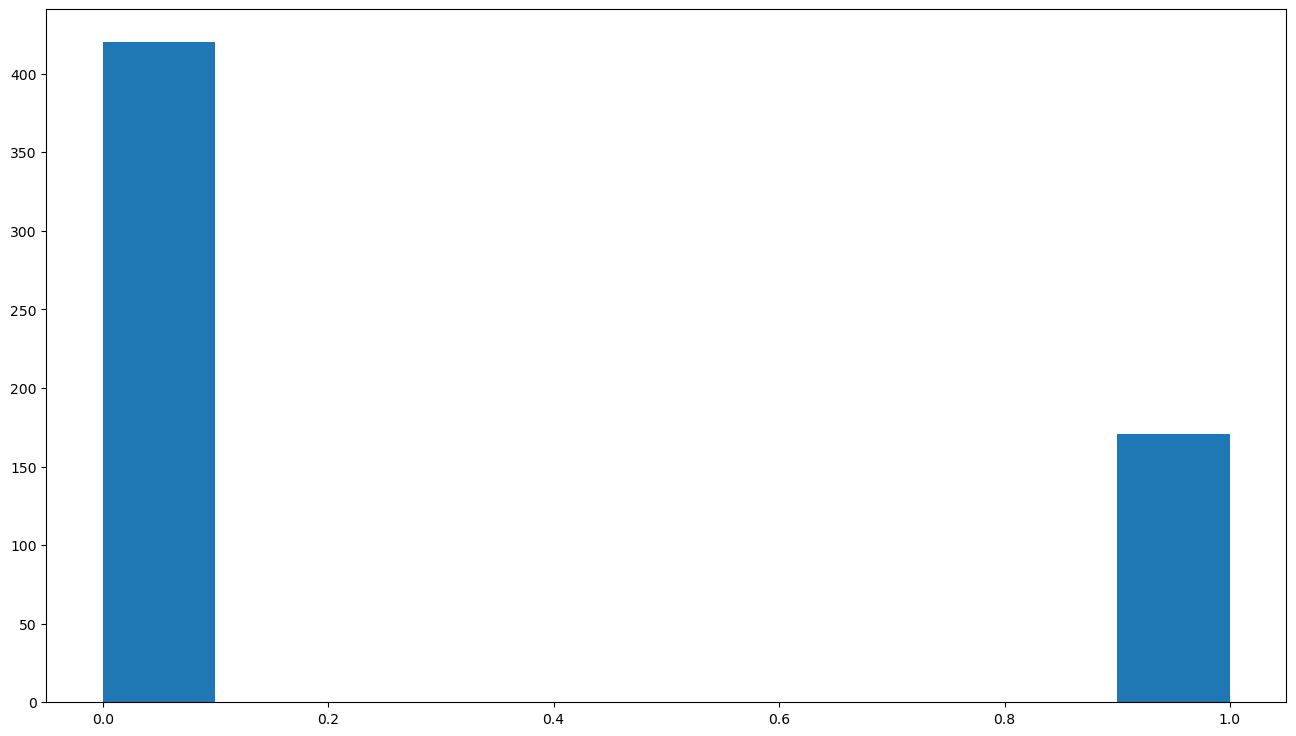

In [55]:
counts, bins = np.histogram(stars_table["Prograde"])

plt.hist(bins[:-1], bins, weights=counts)



In [56]:
# counts, bins = np.histogram(Mg_H)

# plt.hist(bins[:-1], bins, weights=counts)

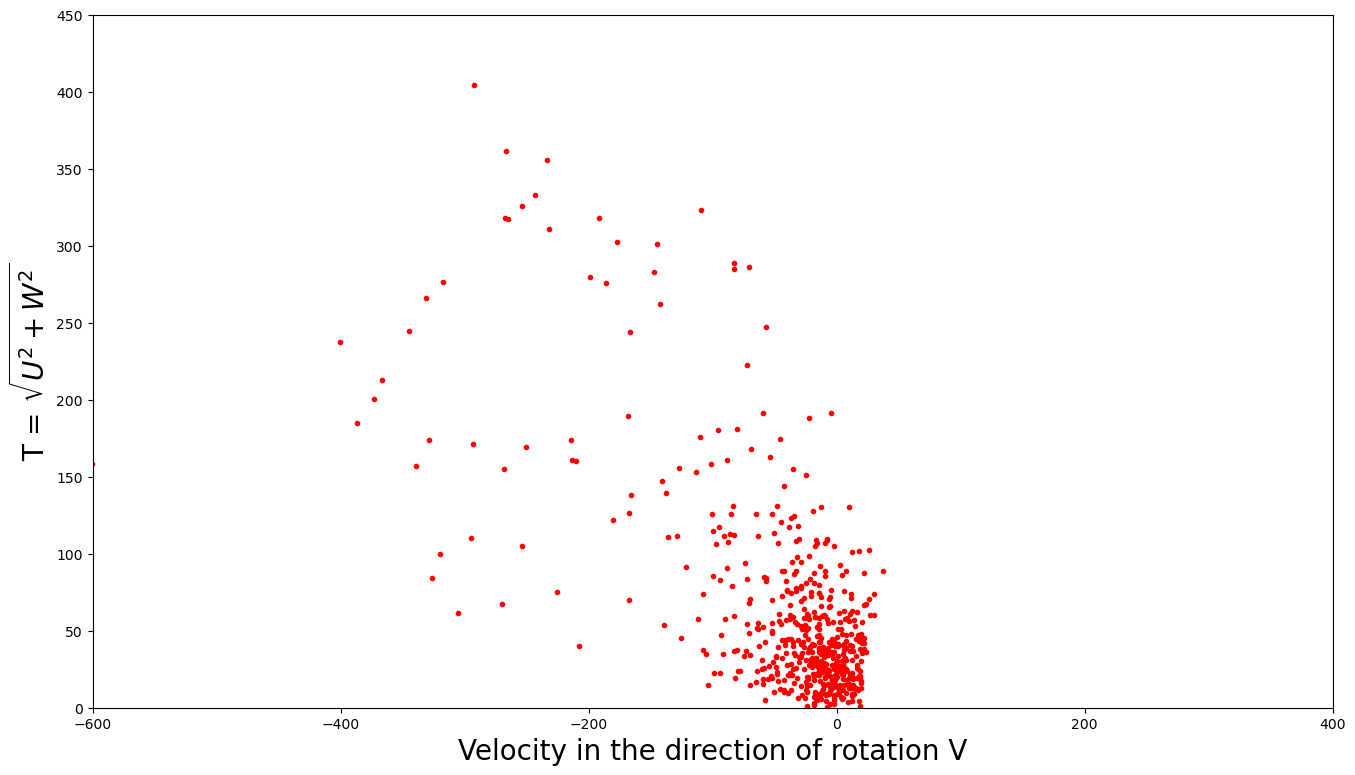

In [57]:
plt.scatter(stars_table_df["V"], stars_table_df["T"], marker='.', color='r')
plt.xlabel('Velocity in the direction of rotation V', fontsize=20)
plt.ylabel( r'T = $\sqrt{U^2 + W^2}$', fontsize=20)

plt.xlim(-600,  400)
plt.ylim(0, 450)
plt.show()

plt.show()

In [35]:
# Questions

# how to write those in the file? 
# how to retrograde vs prograde split? 
# how to save uvw data into the file to not re-run?
# how to save all the values including retrograd vs prograd?
# 
# how to plot histogram retrograd vs prograd
#
# how to on top of that plot histogram mag vs iron for each star
# how to put the code in classes to not be so messy ?

# magn. abundances
# histogram mag vs iron 
# retrograde vs prograde histogram on top ^
# [Mg/H] = [Mg/Fe] - [Fe/H]
# [Mg/H] = [Mg/Fe] - [Fe/H]
# Histogram of [Mg/Fe]
# [Mg/H] vs. [Fe/H] different colors/symbols for prograde vs. retrograde
# 